In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:

with open('./portfolio_summary.json', 'r', encoding='utf-8') as f:
    data = json.load(f)  

# make DataFrame
df = pd.DataFrame(data)

# Convert datetime to date type
df['datetime'] = pd.to_datetime(df['datetime'])

In [3]:
# Y-axis formatter to millions
def millions(x, pos):
    return f'{x * 1e-6:.1f} million'

In [4]:
## year show 

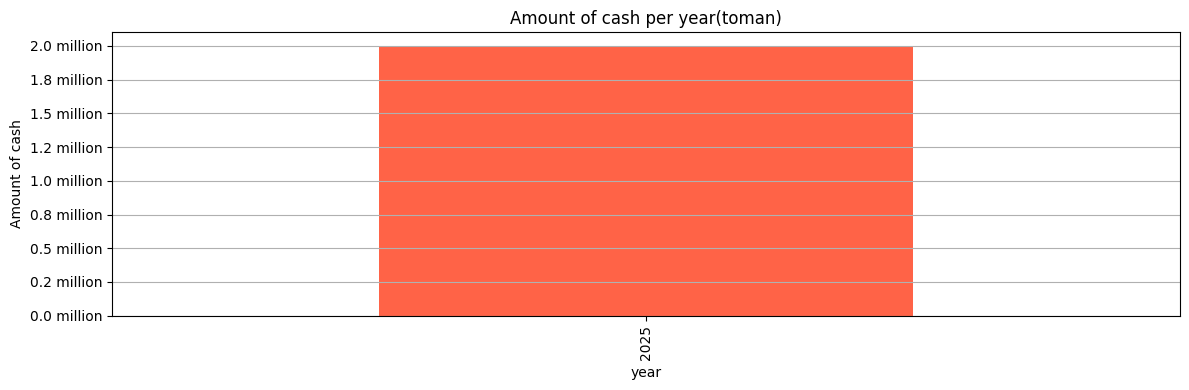

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year

# Sort by time
df_sorted = df.sort_values('datetime')

# Get the latest cash value for each year
last_values = df_sorted.groupby('year').tail(1).set_index('year')['cash_toman']



# Draw a diagram
fig, ax = plt.subplots(figsize=(12, 4))
last_values.plot(kind='bar', color='tomato', ax=ax)

# Appearance settings
ax.set_title("Amount of cash per year(toman)")
ax.set_ylabel("Amount of cash")
ax.set_xlabel("year")
ax.grid(axis='y')

# Apply formatting to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(millions))

plt.tight_layout()
plt.savefig('Amount of cash per year(toman)', bbox_inches='tight', dpi=300)

plt.show()


In [6]:
# month show 

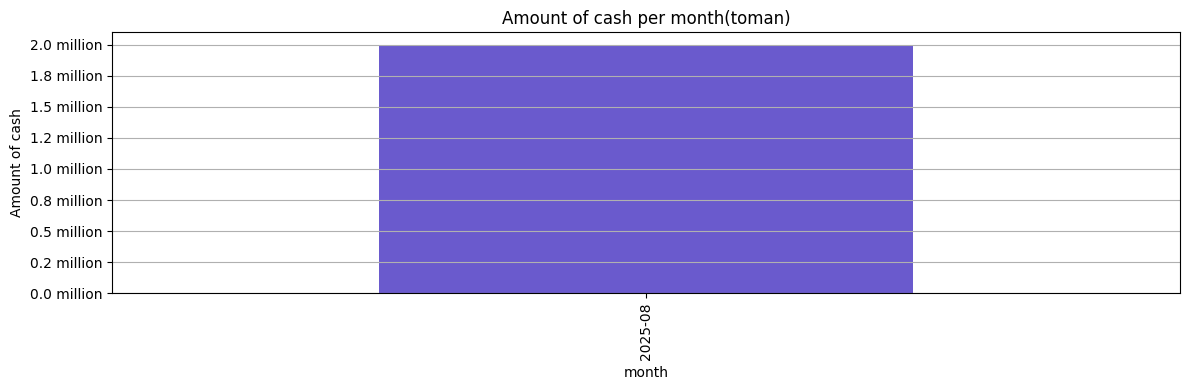

In [7]:

df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.to_period('M')  # Monthly period

# Sort by time
df_sorted = df.sort_values('datetime')

# Get the latest cash value for each month
last_monthly_values = df_sorted.groupby('month').tail(1).set_index('month')['cash_toman']


fig, ax = plt.subplots(figsize=(12, 4))
# Draw a diagram
last_monthly_values.plot(kind='bar', figsize=(12, 4), color='slateblue')
ax.set_title("Amount of cash per month(toman)")
ax.set_ylabel("Amount of cash")
ax.set_xlabel("month")
ax.grid(axis='y')
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.tight_layout()
plt.savefig('Amount of cash per month(toman)', bbox_inches='tight', dpi=300)

plt.show()


In [8]:
## day

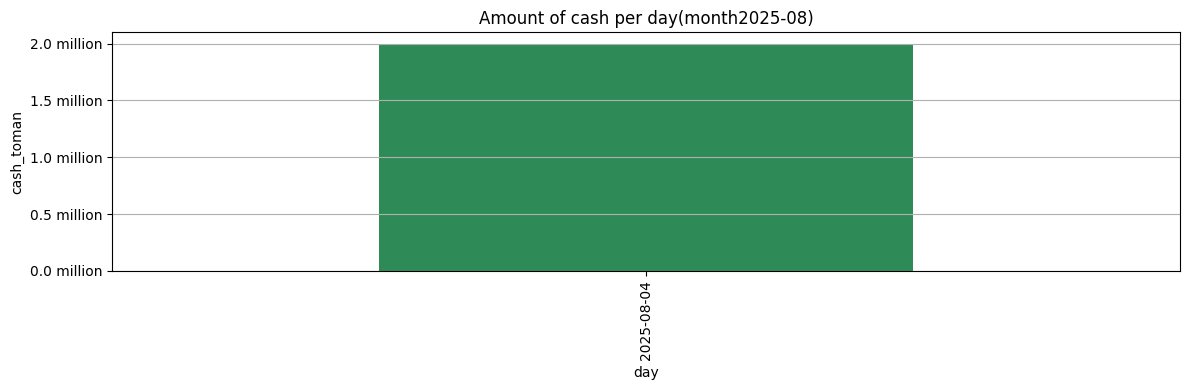

In [9]:
df['month'] = df['datetime'].dt.to_period('M')
df['day'] = df['datetime'].dt.to_period('D')

# Default value: the last month in the data
latest_month = df['month'].max()

# 👇 If you want to manually specify the month (for example, May 2025)
#latest_month = pd.Period('2025-12', freq='M')
# Filter data for that month

monthly_data = df[df['month'] == latest_month].sort_values('datetime')

# Get the latestcash__toman value each day
last_daily_values = monthly_data.groupby('day').tail(1).set_index('day')['cash_toman']


fig, ax = plt.subplots(figsize=(12, 4))
last_daily_values.plot(kind='bar', figsize=(12, 4), color='seagreen')
ax.set_title(f"Amount of cash per day(month{latest_month})")
ax.set_ylabel("cash_toman")
ax.set_xlabel("day")
plt.grid(axis='y')
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.tight_layout()
plt.savefig(f"Amount of cash per day(month{latest_month})", bbox_inches='tight', dpi=300)

#plt.show()
